In [1]:
import pandas as pd
import numpy as np
import os
import cv2

In [3]:
#import the training ,test and validation sets

df_test = pd.read_csv("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv")
df_train= pd.read_csv("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv")

df_val = pd.read_csv("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")

In [4]:
df_train

,IMAGE,MEDICINE_NAME,GENERIC_NAME
0,0.png,Aceta,Paracetamol
1,1.png,Aceta,Paracetamol
2,2.png,Aceta,Paracetamol
3,3.png,Aceta,Paracetamol
4,4.png,Aceta,Paracetamol
...,...,...,...
3115,3115.png,Zithrin,Azithromycin Dihydrate
3116,3116.png,Zithrin,Azithromycin Dihydrate
3117,3117.png,Zithrin,Azithromycin Dihydrate
3118,3118.png,Zithrin,Azithromycin Dihydrate


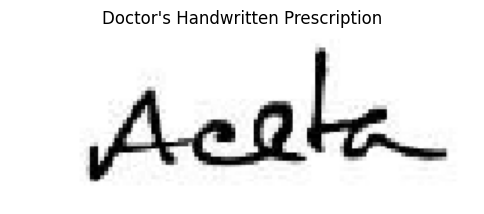

(84, 227, 3)


In [5]:
import cv2
import matplotlib.pyplot as plt

# Path to the image
image_path = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words/1.png"

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.title("Doctor's Handwritten Prescription")
plt.show()
print(img_rgb.shape)

In [6]:
# Add the images along with the dataset
    
from tensorflow.keras.preprocessing.image import img_to_array, load_img
train_path = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"
test_path="/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"
val_path ="/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words"
train_image=[]
test_image=[]
val_image=[]
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)


for element in df_train['IMAGE']:
    abs_path = os.path.join(train_path, element)
    image = load_img(abs_path, target_size=(84, 84))  # Resize to 100x100
    image_array = np.array(image, dtype='float32') / 255.0  # Normalize to [0, 1]
    train_image.append(image_array)

# Load and process testing images
for element in df_test['IMAGE']:
    abs_path = os.path.join(test_path, element)
    image = load_img(abs_path, target_size=(84, 84))
    image_array = np.array(image, dtype='float32') / 255.0
    test_image.append(image_array)

# Load and process validation images
for element in df_val['IMAGE']:
    abs_path = os.path.join(val_path, element)
    image = load_img(abs_path, target_size=(84, 84))
    image_array = np.array(image, dtype='float32') / 255.0
    val_image.append(image_array)

# Convert lists to numpy arrays with shape (num_samples, height, width, channels)
train = np.array(train_image, dtype='float32')
test = np.array(test_image, dtype='float32')
val = np.array(val_image, dtype="float32")

# Check shapes of the image arrays
print("Training data shape:", train.shape)  # Should be (num_samples, 100, 100, 3)
print("Test data shape:", test.shape)
print("Validation data shape:", val.shape)

# Assign image data to the DataFrame

    


    
    

(3120, 3)
(780, 3)
(780, 3)
Training data shape: (3120, 84, 84, 3)
Test data shape: (780, 84, 84, 3)
Validation data shape: (780, 84, 84, 3)


In [7]:
df_test["MEDICINE_NAME"]


0        Aceta
1        Aceta
2        Aceta
3        Aceta
4        Aceta
        ...   
775    Zithrin
776    Zithrin
777    Zithrin
778    Zithrin
779    Zithrin
Name: MEDICINE_NAME, Length: 780, dtype: object

In [8]:
arr=df_train['MEDICINE_NAME'].unique()
map1={}

for pos,key in enumerate(arr):
    map1[key]=pos

df_train['MEDICINE_NAME']=df_train['MEDICINE_NAME'].map(map1)
df_test['MEDICINE_NAME']=df_test['MEDICINE_NAME'].map(map1)
df_val['MEDICINE_NAME']=df_val['MEDICINE_NAME'].map(map1)

df_test['MEDICINE_NAME']

0       0
1       0
2       0
3       0
4       0
       ..
775    77
776    77
777    77
778    77
779    77
Name: MEDICINE_NAME, Length: 780, dtype: int64

In [10]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
def create_model():
    model = tf.keras.models.Sequential([ 
          tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(84,84,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(78, activation='softmax')
      ])

    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=RMSprop(learning_rate=1e-4),
                    metrics=['accuracy'])

    return model

model = create_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 82, 82, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 78)             │        40,014 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,328,078 (16.51 MB)

 Trainable params: 4,328,078 (16.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential, load_model


y_train= np.array(df_train['MEDICINE_NAME'])
y_val= np.array(df_val['MEDICINE_NAME'])
y_test = np.array(df_test['MEDICINE_NAME'])

history=model.fit(train,y_train,validation_data=(val, y_val),epochs=50)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - accuracy: 0.0086 - loss: 4.3700 - val_accuracy: 0.0128 - val_loss: 4.3413
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.0210 - loss: 4.3301 - val_accuracy: 0.0474 - val_loss: 4.2530
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.0526 - loss: 4.1875 - val_accuracy: 0.0936 - val_loss: 3.9100
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.1079 - loss: 3.8523 - val_accuracy: 0.2192 - val_loss: 3.4424
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.1895 - loss: 3.3851 - val_accuracy: 0.3154 - val_loss: 3.0675
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.2779 - loss: 2.9943 - val_accuracy: 0.3500 - val_loss: 2.8001
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.3499 - loss: 2.6461 - val_accuracy: 0.4397 - val_loss: 2.5055
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.4304 - loss: 2.3135 - val_accu

In [8]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

In [7]:
loss, accuracy = model.evaluate(test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('prescription_classification_model.h5')



NameError: name 'model' is not defined

In [9]:
#-------------------------------------------------------------------------------------------------------------------------NEW
#implementation the TFLite optimization

## Optimization: Post-Training Quantization for Deployment

import tensorflow as tf
import os
import time

# Load the best Keras model (from Cell 11)
model_path = 'prescription_classification_model.h5'
keras_model = tf.keras.models.load_model(model_path)

# 1. Instantiate the TFLite Converter
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)

# 2. Apply Optimization (Quantization)
# This setting optimizes for size and latency using float fallback.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 3. Convert the model
tflite_model = converter.convert()

# 4. Save the TFLite model
tflite_model_path = 'prescription_classification_quantized.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Calculate model size reduction
original_size = os.path.getsize(model_path)
quantized_size = os.path.getsize(tflite_model_path)

print(f"Original Keras Model Size: {original_size / 1024**2:.2f} MB")
print(f"Quantized TFLite Model Size: {quantized_size / 1024**2:.2f} MB")
print(f"Size Reduction: {100 * (1 - quantized_size / original_size):.2f}%")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'prescription_classification_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define parameters
img_height, img_width, img_channels = 84, 84, 3
sequence_length = img_height  # Each row is a timestep
feature_size = img_width * img_channels  # Features per timestep
output_features = 78

# Reshape the input data

train_reshaped = train.reshape(train.shape[0], sequence_length, feature_size)
y_train = y_train.reshape(y_train.shape[0], -1)

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(sequence_length, feature_size), return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(output_features, activation='linear')
])



# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Summary
model.summary()


# Early stopping and learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)


# Train the model
history=model.fit(train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop, reduce_lr])


In [6]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define parameters
img_height, img_width, img_channels = 84, 84, 3
output_features = 78  # Set the number of output features for your task

# Build AlexNet model with adjustments
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='same', input_shape=(img_height, img_width, img_channels)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

    # 2nd Convolutional Layer
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

    # 3rd Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 4th Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 5th Convolutional Layer
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

    # Flatten layer to reshape into a vector
    Flatten(),

    # Fully connected layers (Dense layers)
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(4096, activation='relu'),
    
    Dense(output_features, activation='linear')  # Adjust output features as needed
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Model summary
model.summary()

# Train the model
history=model.fit(train, y_train, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:
# Ensure the test data is reshaped correctly

# Evaluate the model
loss, accuracy = model.evaluate(train,y_train)
print(f'Test Accuracy: {accuracy :}%')

# Save the model
model.save('prescription_classification_model.h5')


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#------------------------------------------------------------------------------------------------------------------------NEW
## Performance Audit: Benchmarking Inference Latency

# Load the TFLite model interpreter
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def measure_latency(model, input_data, iterations=100):
    """Measures the average inference time of a model."""
    total_time = 0
    # Use the first 100 samples from the test set for benchmarking
    benchmark_data = input_data[:iterations]
    
    for i in range(iterations):
        input_tensor = np.expand_dims(benchmark_data[i], axis=0)
        
        start_time = time.time()
        
        if isinstance(model, tf.lite.Interpreter):
            model.set_tensor(input_details[0]['index'], input_tensor)
            model.invoke()
            output_data = model.get_tensor(output_details[0]['index'])
        else:
            output_data = model.predict(input_tensor, verbose=0)
            
        end_time = time.time()
        total_time += (end_time - start_time)
        
    return (total_time / iterations) * 1000 # Return average time in milliseconds (ms)

# 1. Measure Keras CNN latency (from Cell 11)
keras_latency = measure_latency(keras_model, test)

# 2. Measure TFLite Quantized latency
tflite_latency = measure_latency(interpreter, test)

print(f"--- Deployment Readiness Audit ---")
print(f"Original Keras CNN Latency: {keras_latency:.2f} ms per image")
print(f"Quantized TFLite CNN Latency: {tflite_latency:.2f} ms per image")
print(f"Speedup: {keras_latency / tflite_latency:.2f}x")

In [ ]:
#---------------------------------------------------------------------------------------------------------------------NEW
print("--- Optimization and Deployment Summary ---")
print(f"Successfully optimized the primary CNN model using Post-Training Quantization.")
print(f"Model Size Reduction: {100 * (1 - quantized_size / original_size):.2f}%")
print(f"Inference Speedup Achieved: {keras_latency / tflite_latency:.2f}x, making it suitable for edge deployment.")

In [ ]:
def preprocess_image(image_path):
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    img = cv2.resize(img, (128, 32))  

    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return img

In [ ]:
from PIL import Image
def extract_text_with_ocr(image_path):
    preprocessed_image = preprocess_image(image_path)
    
    img = Image.fromarray(preprocessed_image)
    
    extracted_text = pytesseract.image_to_string(img)
    
    return extracted_text

In [ ]:
import pytesseract
def XYocr(folder):
    lower=folder.lower()
    df=pd.read_csv(f"/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/{folder}/{lower}_labels.csv")
    Y=df['MEDICINE_NAME']

    image_folder=f"/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/{folder}/{lower}_words/"
    image_paths=[os.path.join(image_folder,filename) for filename in df['IMAGE']]
    X = [extract_text_with_ocr(image_path) for image_path in image_paths]

    return X,Y

In [ ]:
from sklearn.metrics import accuracy_score
from transformers import (
    BertTokenizerFast, 
    BertConfig, 
    BertForMaskedLM, 
    AdamW, 
    Trainer, 
    TrainingArguments, 
    DataCollatorForSeq2Seq
)
import torch
from torch.utils.data import Dataset

from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import WordLevelTrainer


xTrain,yTrain=XYocr("Training")
xVal,yVal=XYocr("Validation")
xTest,yTest = XYocr("Testing")
# Define your custom vocabulary (character-level)
vocab_list = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,!?")  
vocab = {char: i for i, char in enumerate(vocab_list, start=1)} 
vocab["[PAD]"] = 0  # Add padding token
vocab["[MASK]"] = len(vocab) + 1  # Mask token
vocab["[CLS]"] = len(vocab) + 2  # CLS token
vocab["[SEP]"] = len(vocab) + 3  # SEP token
vocab["[UNK]"] = len(vocab) + 4  # Unknown token

# Save the vocab to a file
vocab_file = "vocab.txt"
with open(vocab_file, 'w') as f:
    for token in vocab:
        f.write(token + "\n")

# Initialize the tokenizer with the custom vocabulary
tokenizer = BertTokenizerFast(vocab_file=vocab_file)
tokenizer.pad_token = "[PAD]"
tokenizer.mask_token = "[MASK]"
tokenizer.cls_token = "[CLS]"
tokenizer.sep_token = "[SEP]"
tokenizer.unk_token = "[UNK]"

# Save tokenizer to output directory
tokenizer_output_dir = "output_tokenizer"
os.makedirs(tokenizer_output_dir, exist_ok=True)
tokenizer.save_pretrained(tokenizer_output_dir)

# Create a custom Dataset class for loading the data
class CustomDataset(Dataset):
    def __init__(self, x_data, y_data, tokenizer, max_length=128):
        self.x_data = x_data
        self.y_data = y_data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        
        inputs = self.tokenizer(x, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        labels = self.tokenizer(y, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels['input_ids'].squeeze()
        }

# Prepare datasets
train_dataset = CustomDataset(xTrain, yTrain, tokenizer)
val_dataset = CustomDataset(xVal, yVal, tokenizer)
test_dataset = CustomDataset(xTest, yTest, tokenizer)

# Set up BERT model configuration
config = BertConfig(
    vocab_size=len(vocab), 
    hidden_size=256,
    num_hidden_layers=6,
    num_attention_heads=8,
    intermediate_size=512,
    max_position_embeddings=512
)

# Initialize the BERT model for masked language modeling
model = BertForMaskedLM(config)

# Set up optimizer and training arguments
optimizer = AdamW(model.parameters(), lr=0.0001)

# Updated TrainingArguments with necessary logging and reporting fixes
training_args = TrainingArguments(
    output_dir="output_model",  # Save model outputs here
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    eval_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save model at the end of each epoch
    logging_dir=None,  # No need to log
    logging_steps=1,  # Reduced logging
    logging_first_step=False,  # Do not log first step
    report_to="none",  # Disable WANDB and other reporting
    save_steps=10,
    save_total_limit=1,  # Keep only the most recent model
    load_best_model_at_end=True,  # Load the best model at the end
    disable_tqdm=False,  # Keep tqdm progress bar
    fp16=False  # Disable automatic mixed precision
)

# Custom function to compute accuracy
def compute_accuracy(p):
    preds, labels = p
    preds = torch.tensor(preds)  # Convert to tensor
    preds = torch.argmax(preds, dim=-1)
    return {"accuracy": accuracy_score(labels.flatten(), preds.flatten())}

# Set up Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Training dataset
    eval_dataset=val_dataset,  # Validation dataset
    optimizers=(optimizer, None),
    compute_metrics=compute_accuracy
)

# Train the model with epoch-wise output
trainer.train()

# Evaluate the model after training on the validation set
final_metrics = trainer.evaluate(val_dataset)
final_accuracy = final_metrics["eval_accuracy"]
final_loss = final_metrics["eval_loss"]

# Evaluate the model on the test set
test_metrics = trainer.evaluate(test_dataset)
test_accuracy = test_metrics["eval_accuracy"]
test_loss = test_metrics["eval_loss"]

# Display epoch-wise output and final test results
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")